# Importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Dataset

In [2]:
laptop_data = pd.read_csv("/content/drive/MyDrive/Skills/Python/Data mining/Decision Tree/End of year project 2024/laptop_prices.csv")
laptop_data.head(10)

Company          Product   TypeName  Inches  Ram          OS  Weight  \
0   Apple      MacBook Pro  Ultrabook    13.3    8       macOS    1.37   
1   Apple      Macbook Air  Ultrabook    13.3    8       macOS    1.34   
2      HP           250 G6   Notebook    15.6    8       No OS    1.86   
3   Apple      MacBook Pro  Ultrabook    15.4   16       macOS    1.83   
4   Apple      MacBook Pro  Ultrabook    13.3    8       macOS    1.37   
5    Acer         Aspire 3   Notebook    15.6    4  Windows 10    2.10   
6   Apple      MacBook Pro  Ultrabook    15.4   16    Mac OS X    2.04   
7   Apple      Macbook Air  Ultrabook    13.3    8       macOS    1.34   
8    Asus  ZenBook UX430UN  Ultrabook    14.0   16  Windows 10    1.30   
9    Acer          Swift 3  Ultrabook    14.0    8  Windows 10    1.60   

   Price_euros    Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq  \
0      1339.69  Standard     2560  ...            Yes       Intel      2.3   
1       898.94  Standard     1440  ...             No       Intel      1.8   
2       575.00   Full HD     1920  ...             No       Intel      2.5   
3      2537.45  Standard     2880  ...            Yes       Intel      2.7   
4      1803.60  Standard     2560  ...            Yes       Intel      3.1   
5       400.00  Standard     1366  ...             No         AMD      3.0   
6      2139.97  Standard     2880  ...            Yes       Intel      2.2   
7      1158.70  Standard     1440  ...             No       Intel      1.8   
8      1495.00   Full HD     1920  ...             No       Intel      1.8   
9       770.00   Full HD     1920  ...             No       Intel      1.6   

        CPU_model PrimaryStorage  SecondaryStorage PrimaryStorageType  \
0         Core i5            128                 0                SSD   
1         Core i5            128                 0      Flash Storage   
2   Core i5 7200U            256                 0                SSD   
3         Core i7            512                 0                SSD   
4         Core i5            256                 0                SSD   
5  A9-Series 9420            500                 0                HDD   
6         Core i7            256                 0      Flash Storage   
7         Core i5            256                 0      Flash Storage   
8   Core i7 8550U            512                 0                SSD   
9   Core i5 8250U            256                 0                SSD   

   SecondaryStorageType  GPU_company               GPU_model  
0                    No        Intel  Iris Plus Graphics 640  
1                    No        Intel        HD Graphics 6000  
2                    No        Intel         HD Graphics 620  
3                    No          AMD          Radeon Pro 455  
4                    No        Intel  Iris Plus Graphics 650  
5                    No          AMD               Radeon R5  
6                    No        Intel       Iris Pro Graphics  
7                    No        Intel        HD Graphics 6000  
8                    No       Nvidia           GeForce MX150  
9                    No        Intel        UHD Graphics 620  

[10 rows x 23 columns]

# Analyse Data

In [3]:
print(laptop_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

<Axes: xlabel='Company', ylabel='count'>

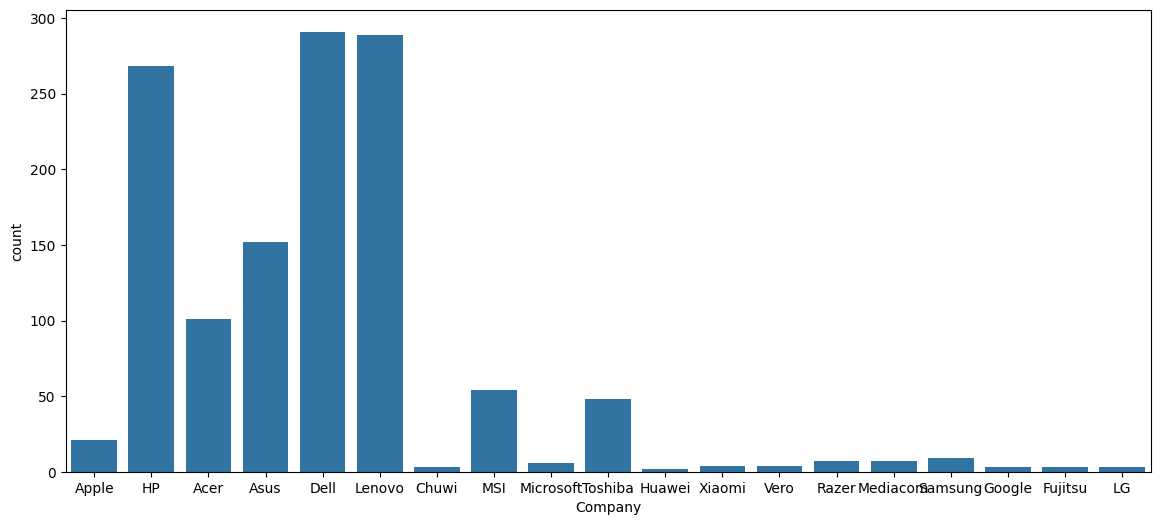

In [4]:
plt.figure(figsize=(14, 6))
sns.countplot(x=laptop_data["Company"])

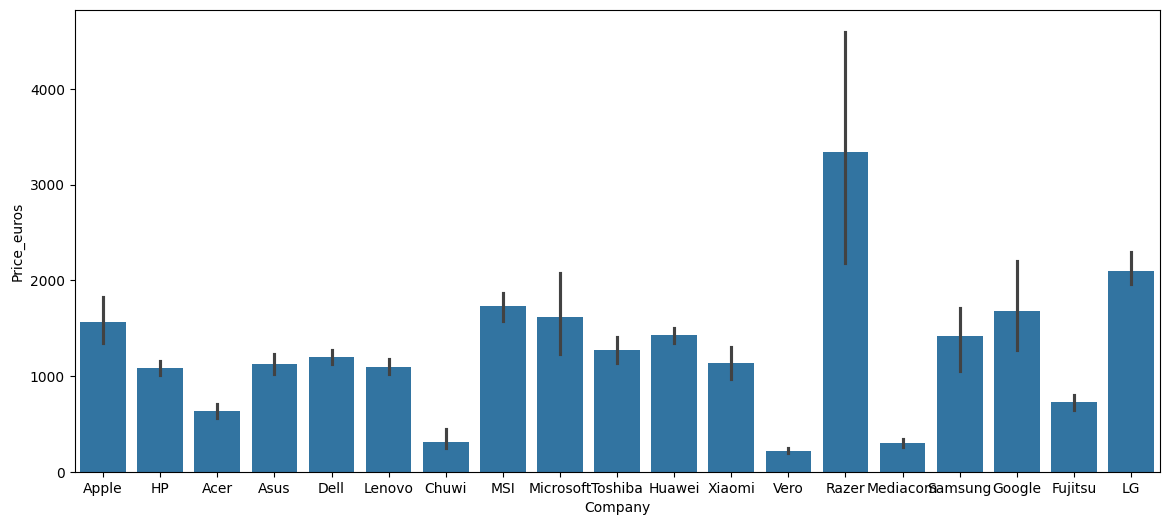

In [5]:
plt.figure(figsize=(14, 6))
sns.barplot(x=laptop_data["Company"], y=laptop_data["Price_euros"])
plt.show()

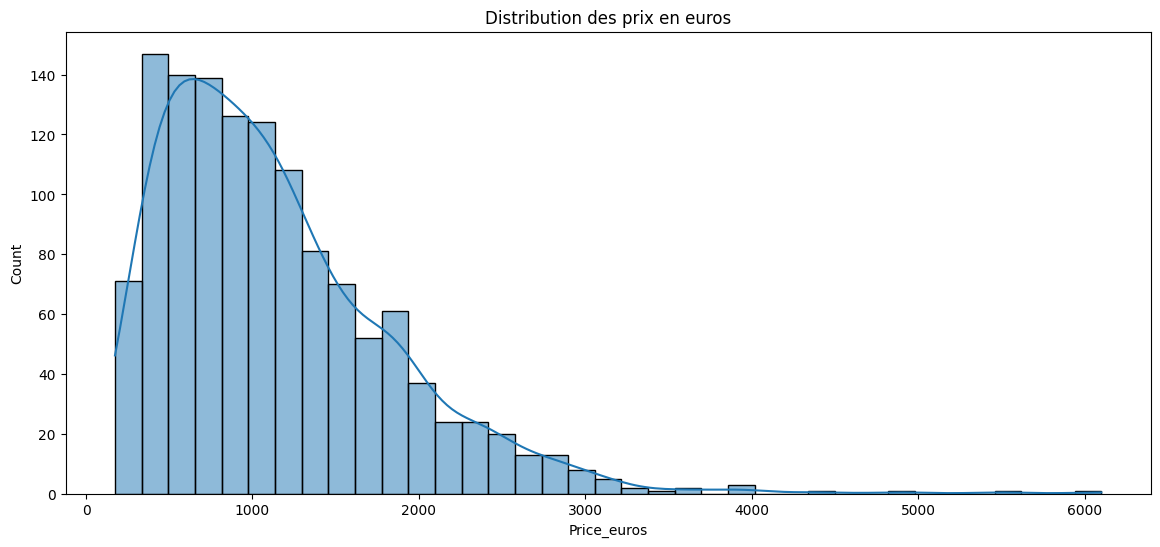

In [6]:
plt.figure(figsize=(14, 6))
sns.histplot(data=laptop_data, x='Price_euros', kde=True)
plt.title('Distribution des prix en euros')
plt.show()

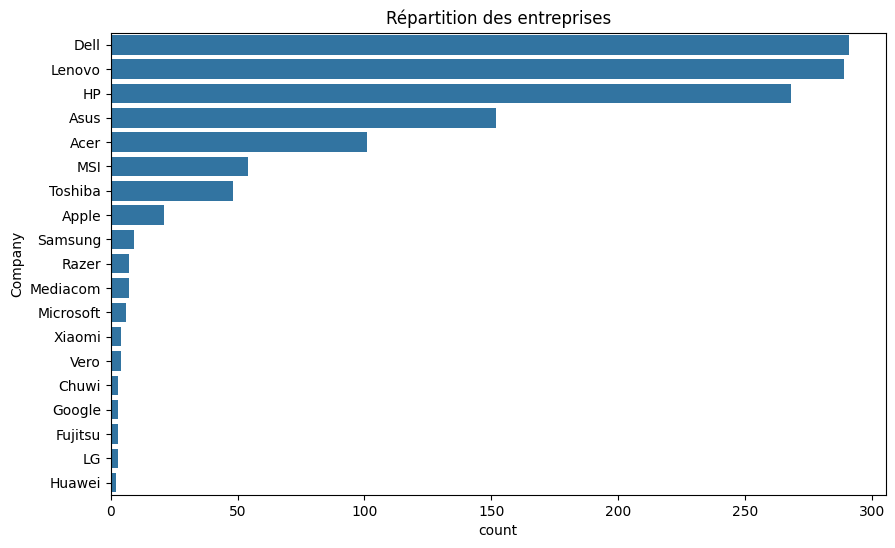

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Company', data=laptop_data, order=laptop_data['Company'].value_counts().index)
plt.title('Répartition des entreprises')
plt.show()

# Preparing Data

In [8]:
laptop_data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [9]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [10]:
X = laptop_data[["Inches", "Ram", "Weight", "ScreenW", "ScreenH", "CPU_freq", "PrimaryStorage", "SecondaryStorage", "Price_euros"]] # on a utilise des chiffre mais, on peut aussi utiliser des lettres
y = laptop_data["Company"] # Prediction (maybe regression or classification)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=14)

# Implementation decision tree

# Gini

In [12]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
print(clf.get_depth()) # tree profondeur

19


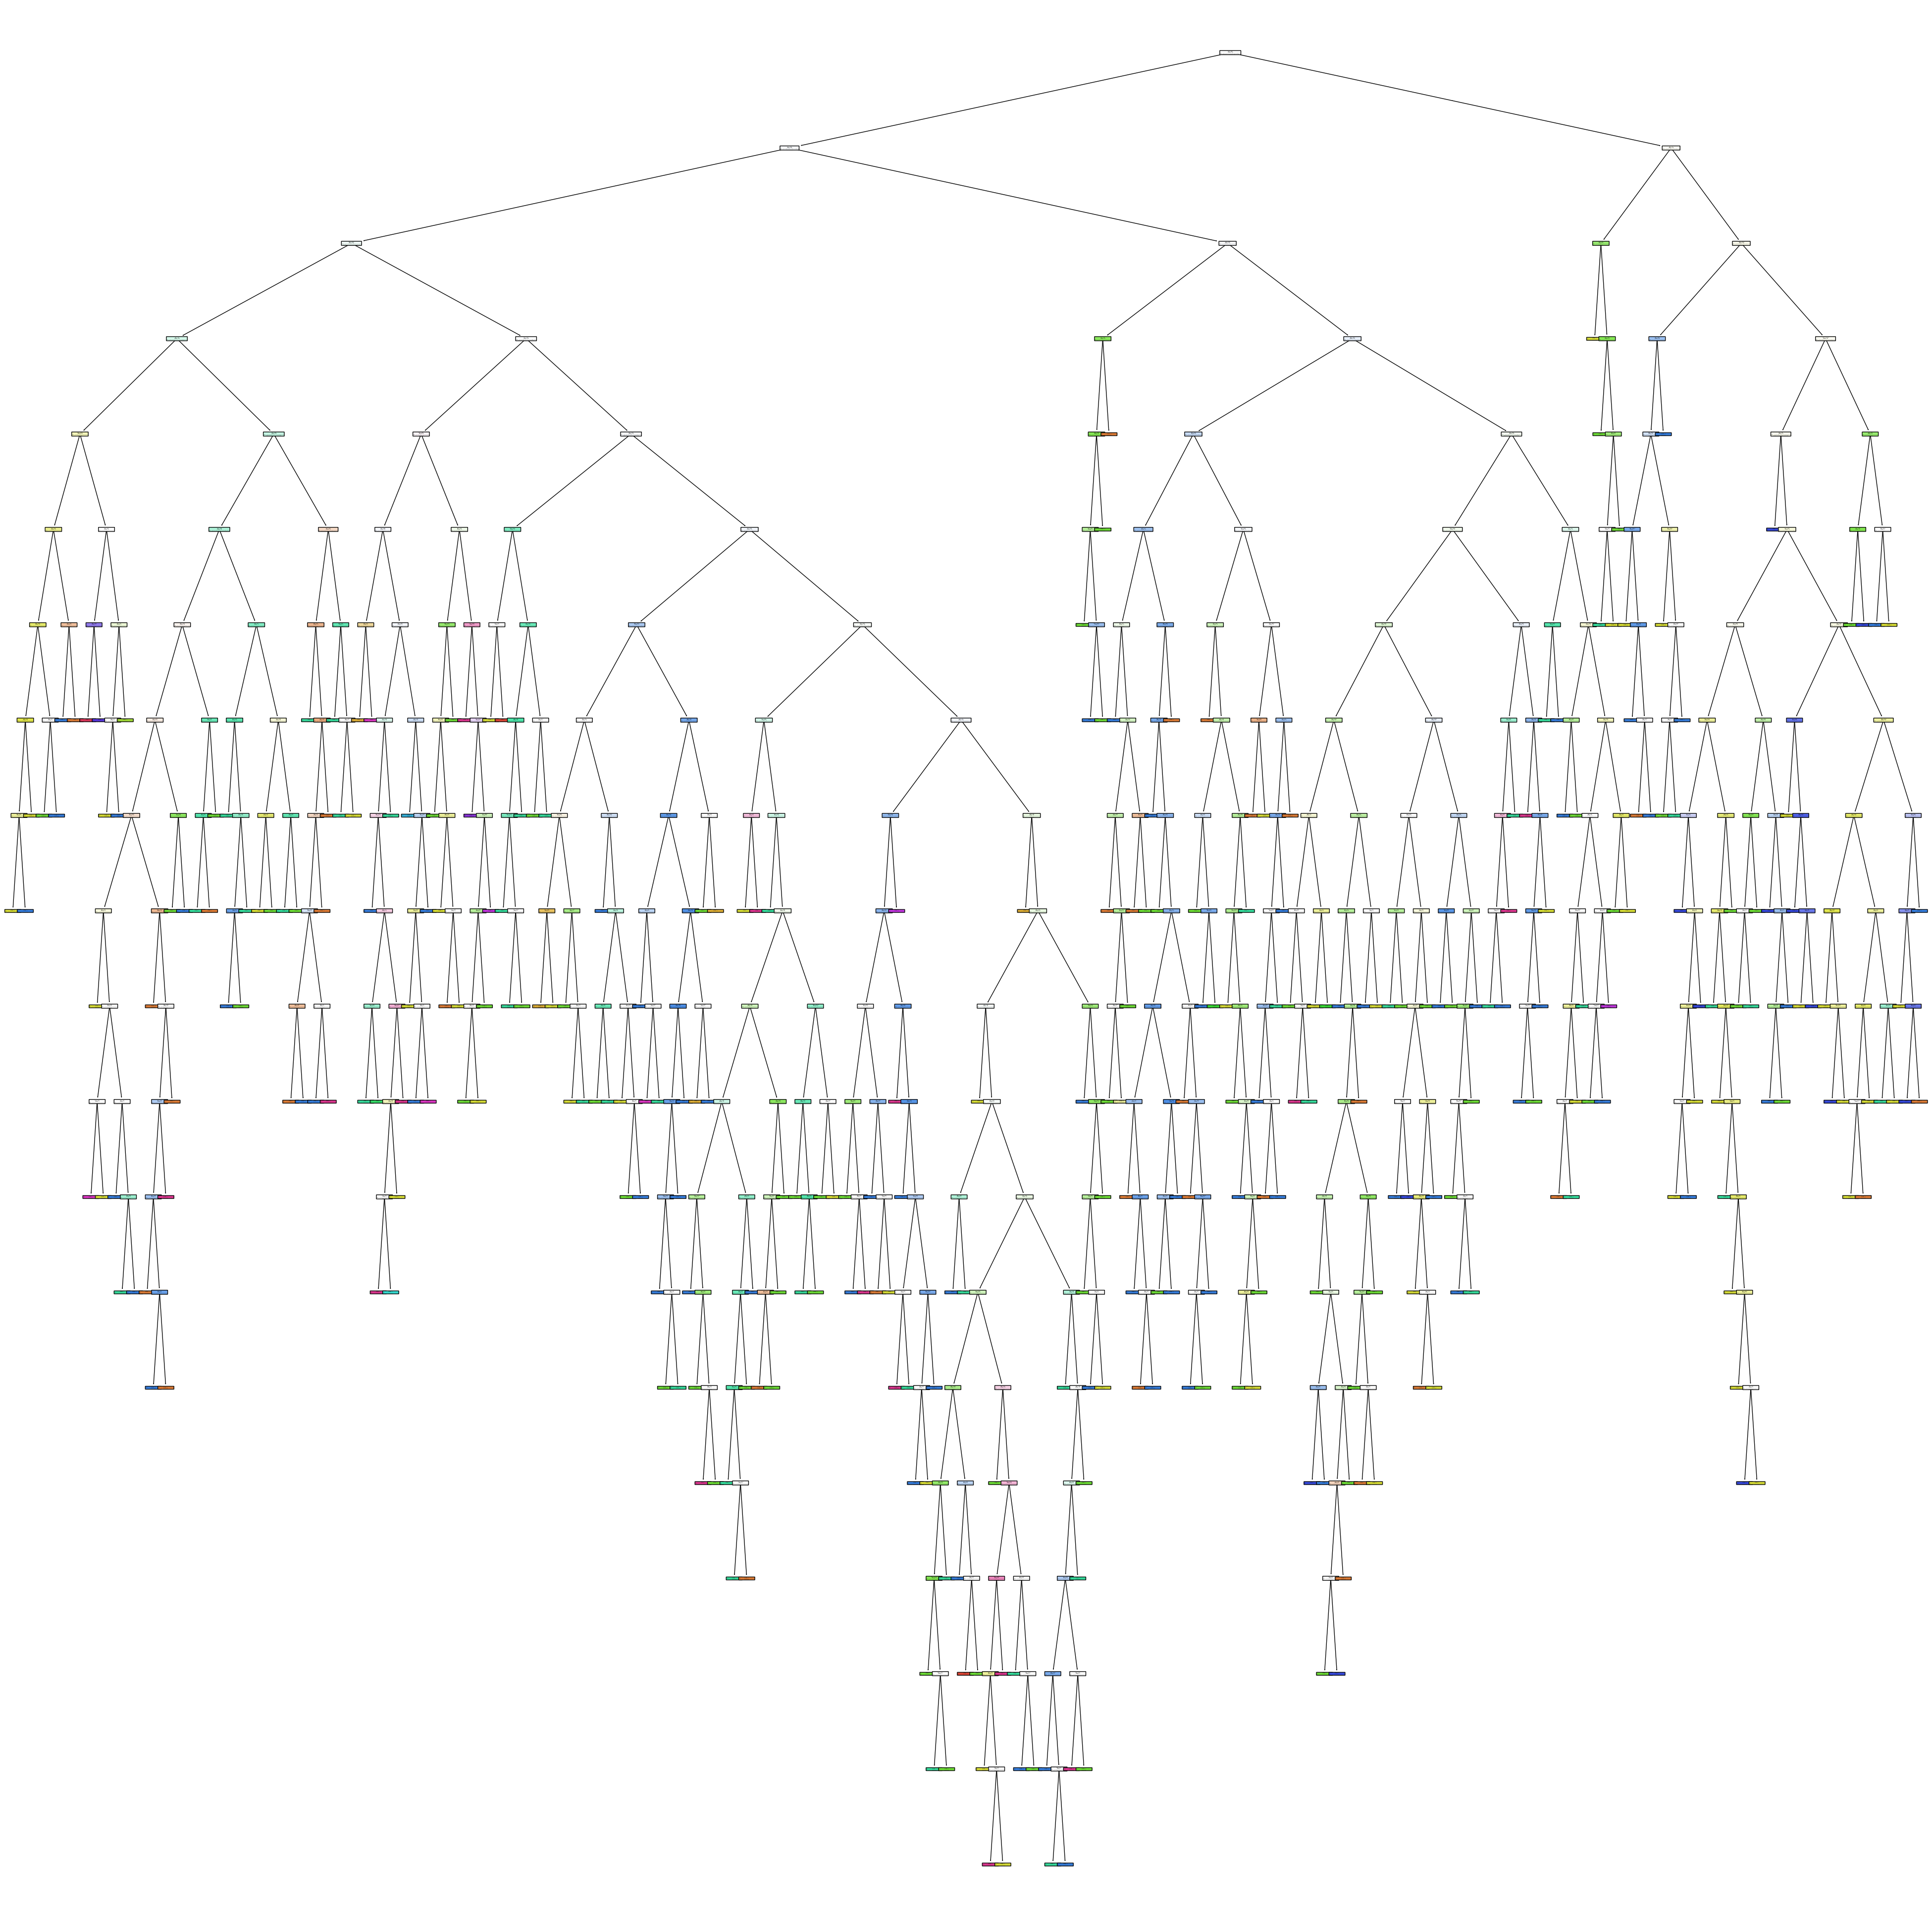

In [14]:
plt.figure(figsize=(50, 50))
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()

In [15]:
y_pred = clf.predict(X_test)

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Acer       0.42      0.46      0.44        41
       Apple       0.62      0.83      0.71         6
        Asus       0.34      0.49      0.40        47
       Chuwi       0.00      0.00      0.00         0
        Dell       0.73      0.67      0.70       115
     Fujitsu       0.00      0.00      0.00         1
      Google       1.00      0.50      0.67         2
          HP       0.69      0.59      0.63       124
      Huawei       1.00      1.00      1.00         1
          LG       1.00      1.00      1.00         1
      Lenovo       0.53      0.51      0.52       114
         MSI       0.43      0.52      0.47        25
    Mediacom       0.50      0.75      0.60         4
   Microsoft       1.00      1.00      1.00         3
       Razer       1.00      0.67      0.80         3
     Samsung       0.00      0.00      0.00         4
     Toshiba       0.25      0.29      0.27        14
        Vero       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


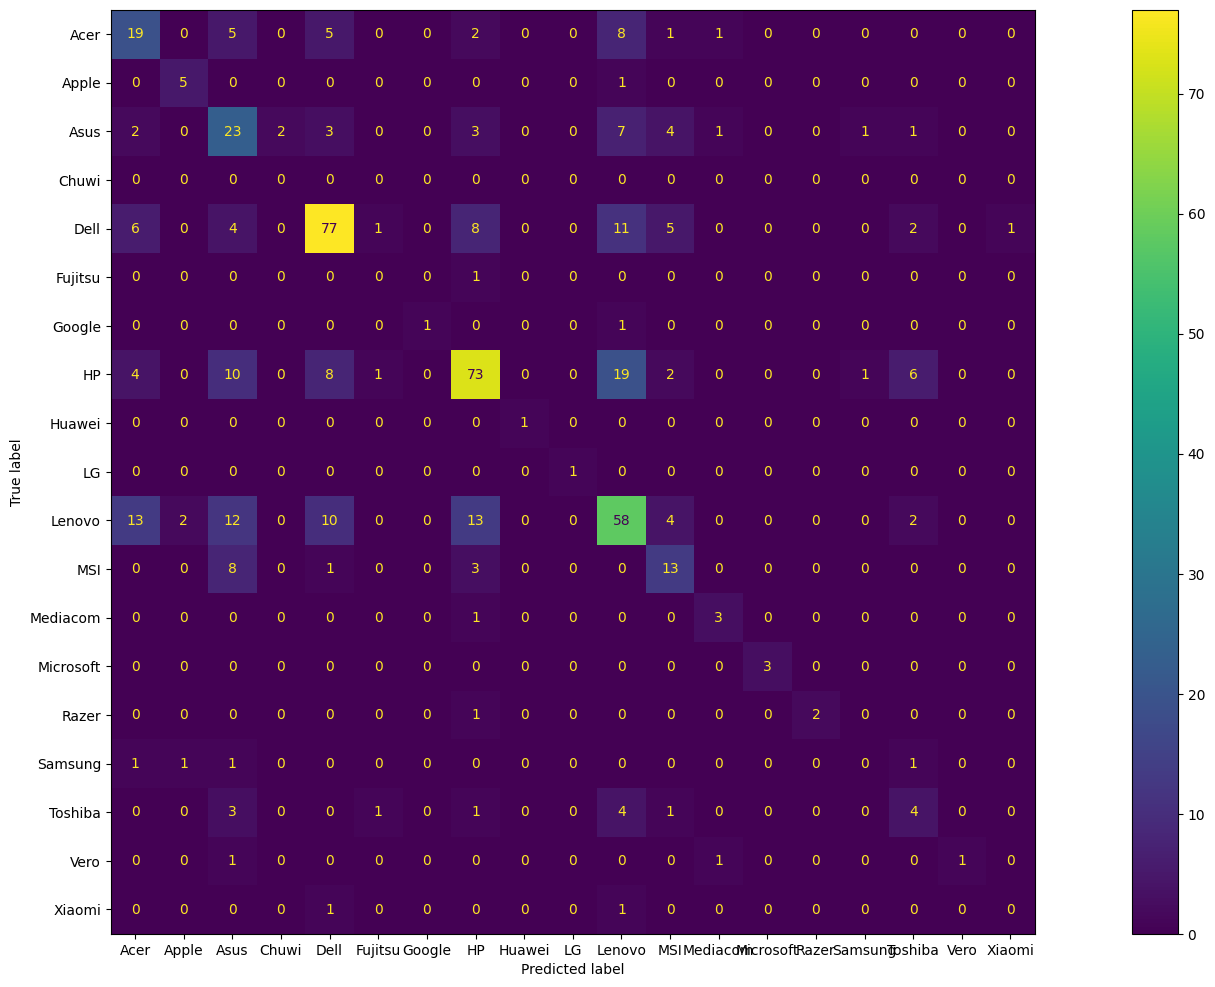

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(y_train))

fig, ax = plt.subplots(figsize=(25, 12))  # Ajuster la taille de la figure si nécessaire
cm_display.plot(ax=ax) # Utiliser une colormap pour la matrice de confusion # Tracer la matrice de confusion sur les axes définis
plt.show()

In [18]:
# print(len(np.unique(y_pred)))

print(len(np.unique(y_test)))

print(len(np.unique(y_train)))

18
19


### With entropy

In [19]:
clf = DecisionTreeClassifier(criterion="entropy")

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
print(clf.get_depth())

18


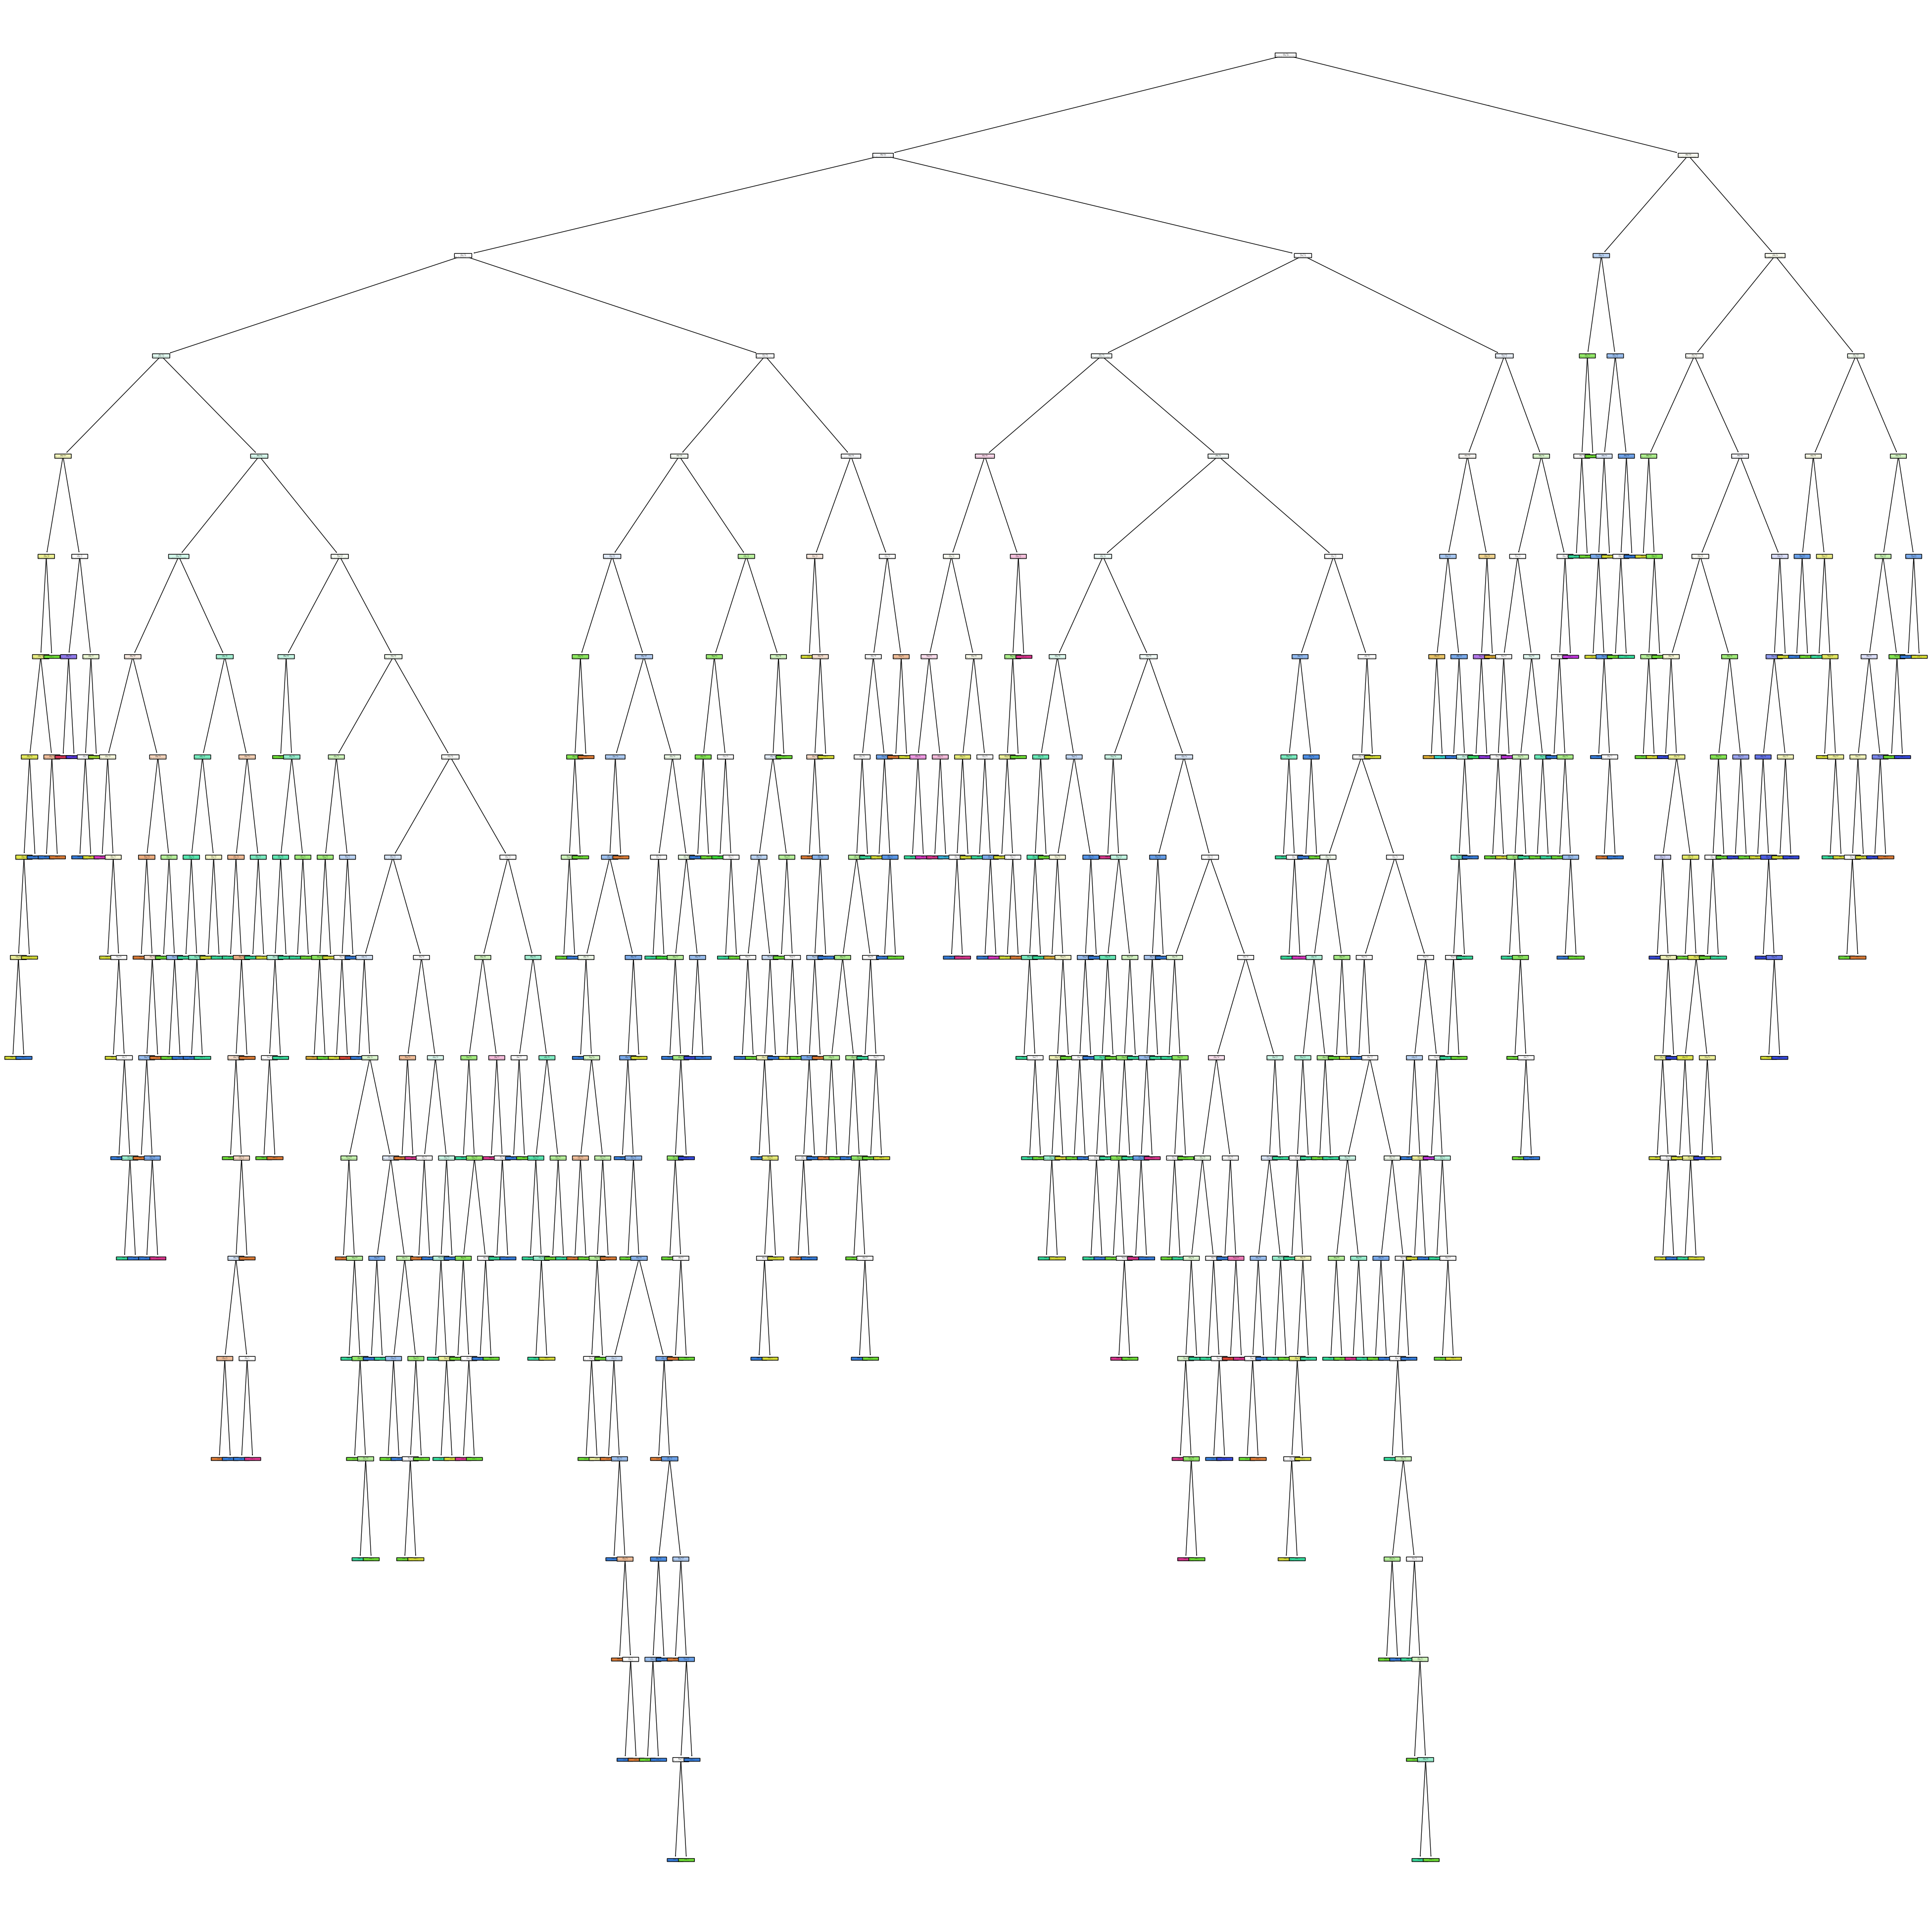

In [21]:
plt.figure(figsize=(50, 50))
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()

In [22]:
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Acer       0.53      0.56      0.55        41
       Apple       0.86      1.00      0.92         6
        Asus       0.34      0.47      0.39        47
       Chuwi       0.00      0.00      0.00         0
        Dell       0.55      0.53      0.54       115
     Fujitsu       0.00      0.00      0.00         1
      Google       1.00      1.00      1.00         2
          HP       0.59      0.54      0.57       124
      Huawei       1.00      1.00      1.00         1
          LG       1.00      1.00      1.00         1
      Lenovo       0.51      0.47      0.49       114
         MSI       0.42      0.44      0.43        25
    Mediacom       0.50      0.75      0.60         4
   Microsoft       1.00      0.67      0.80         3
       Razer       1.00      0.67      0.80         3
     Samsung       0.00      0.00      0.00         4
     Toshiba       0.26      0.36      0.30        14
        Vero       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


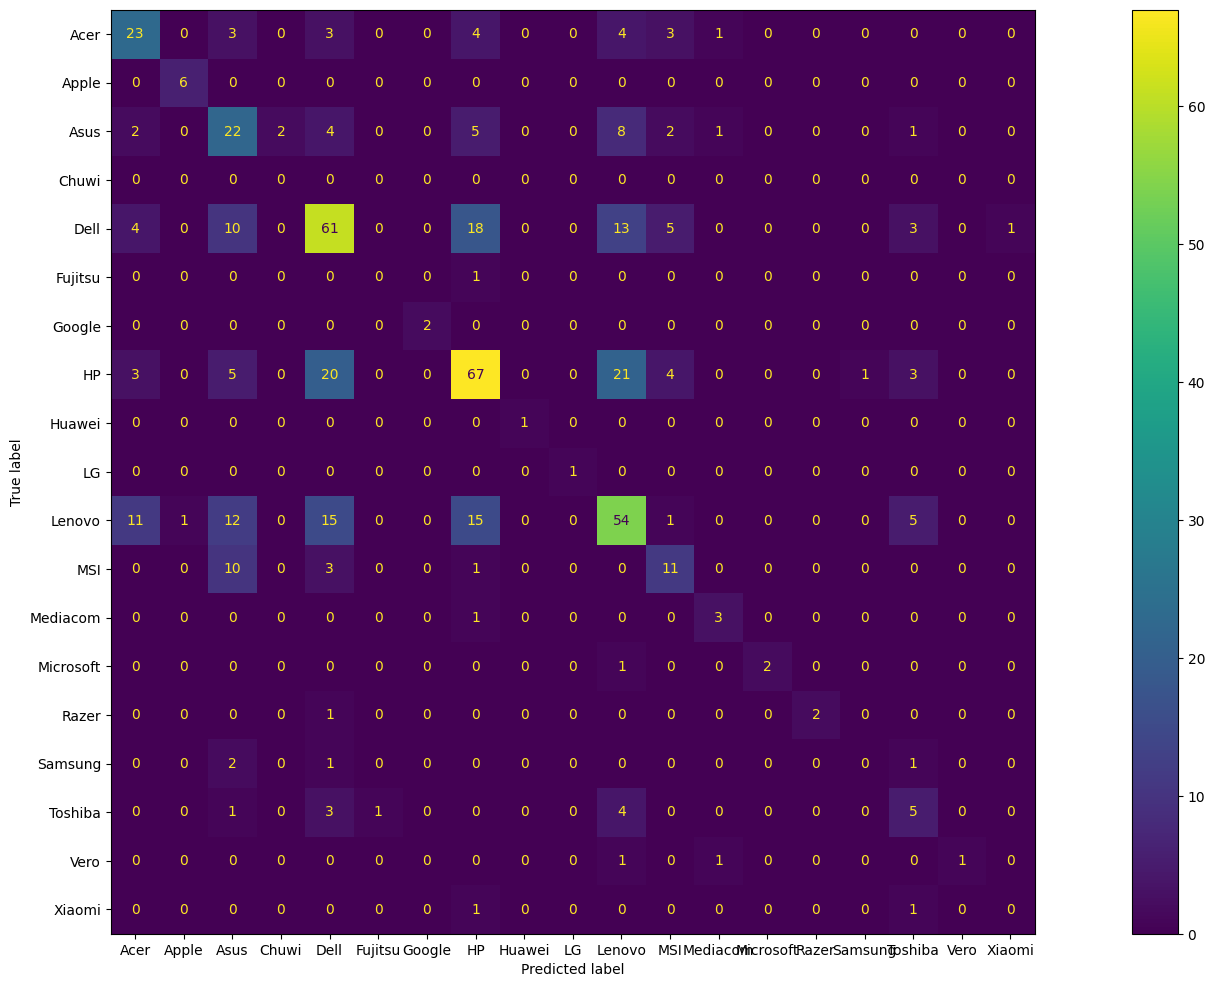

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(y_train))

fig, ax = plt.subplots(figsize=(25,12))
cm_display.plot(ax=ax)
plt.show()

# Pre-pruning

In [ ]:
grid_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 20, 1),
    "min_samples_leaf": range(1, 15, 1),
    "min_samples_split": range(2, 20, 1)
}

grid_search = GridSearchCV(estimator=clf, param_grid=grid_param, n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(error_score='raise',
             estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20)})

In [ ]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2}


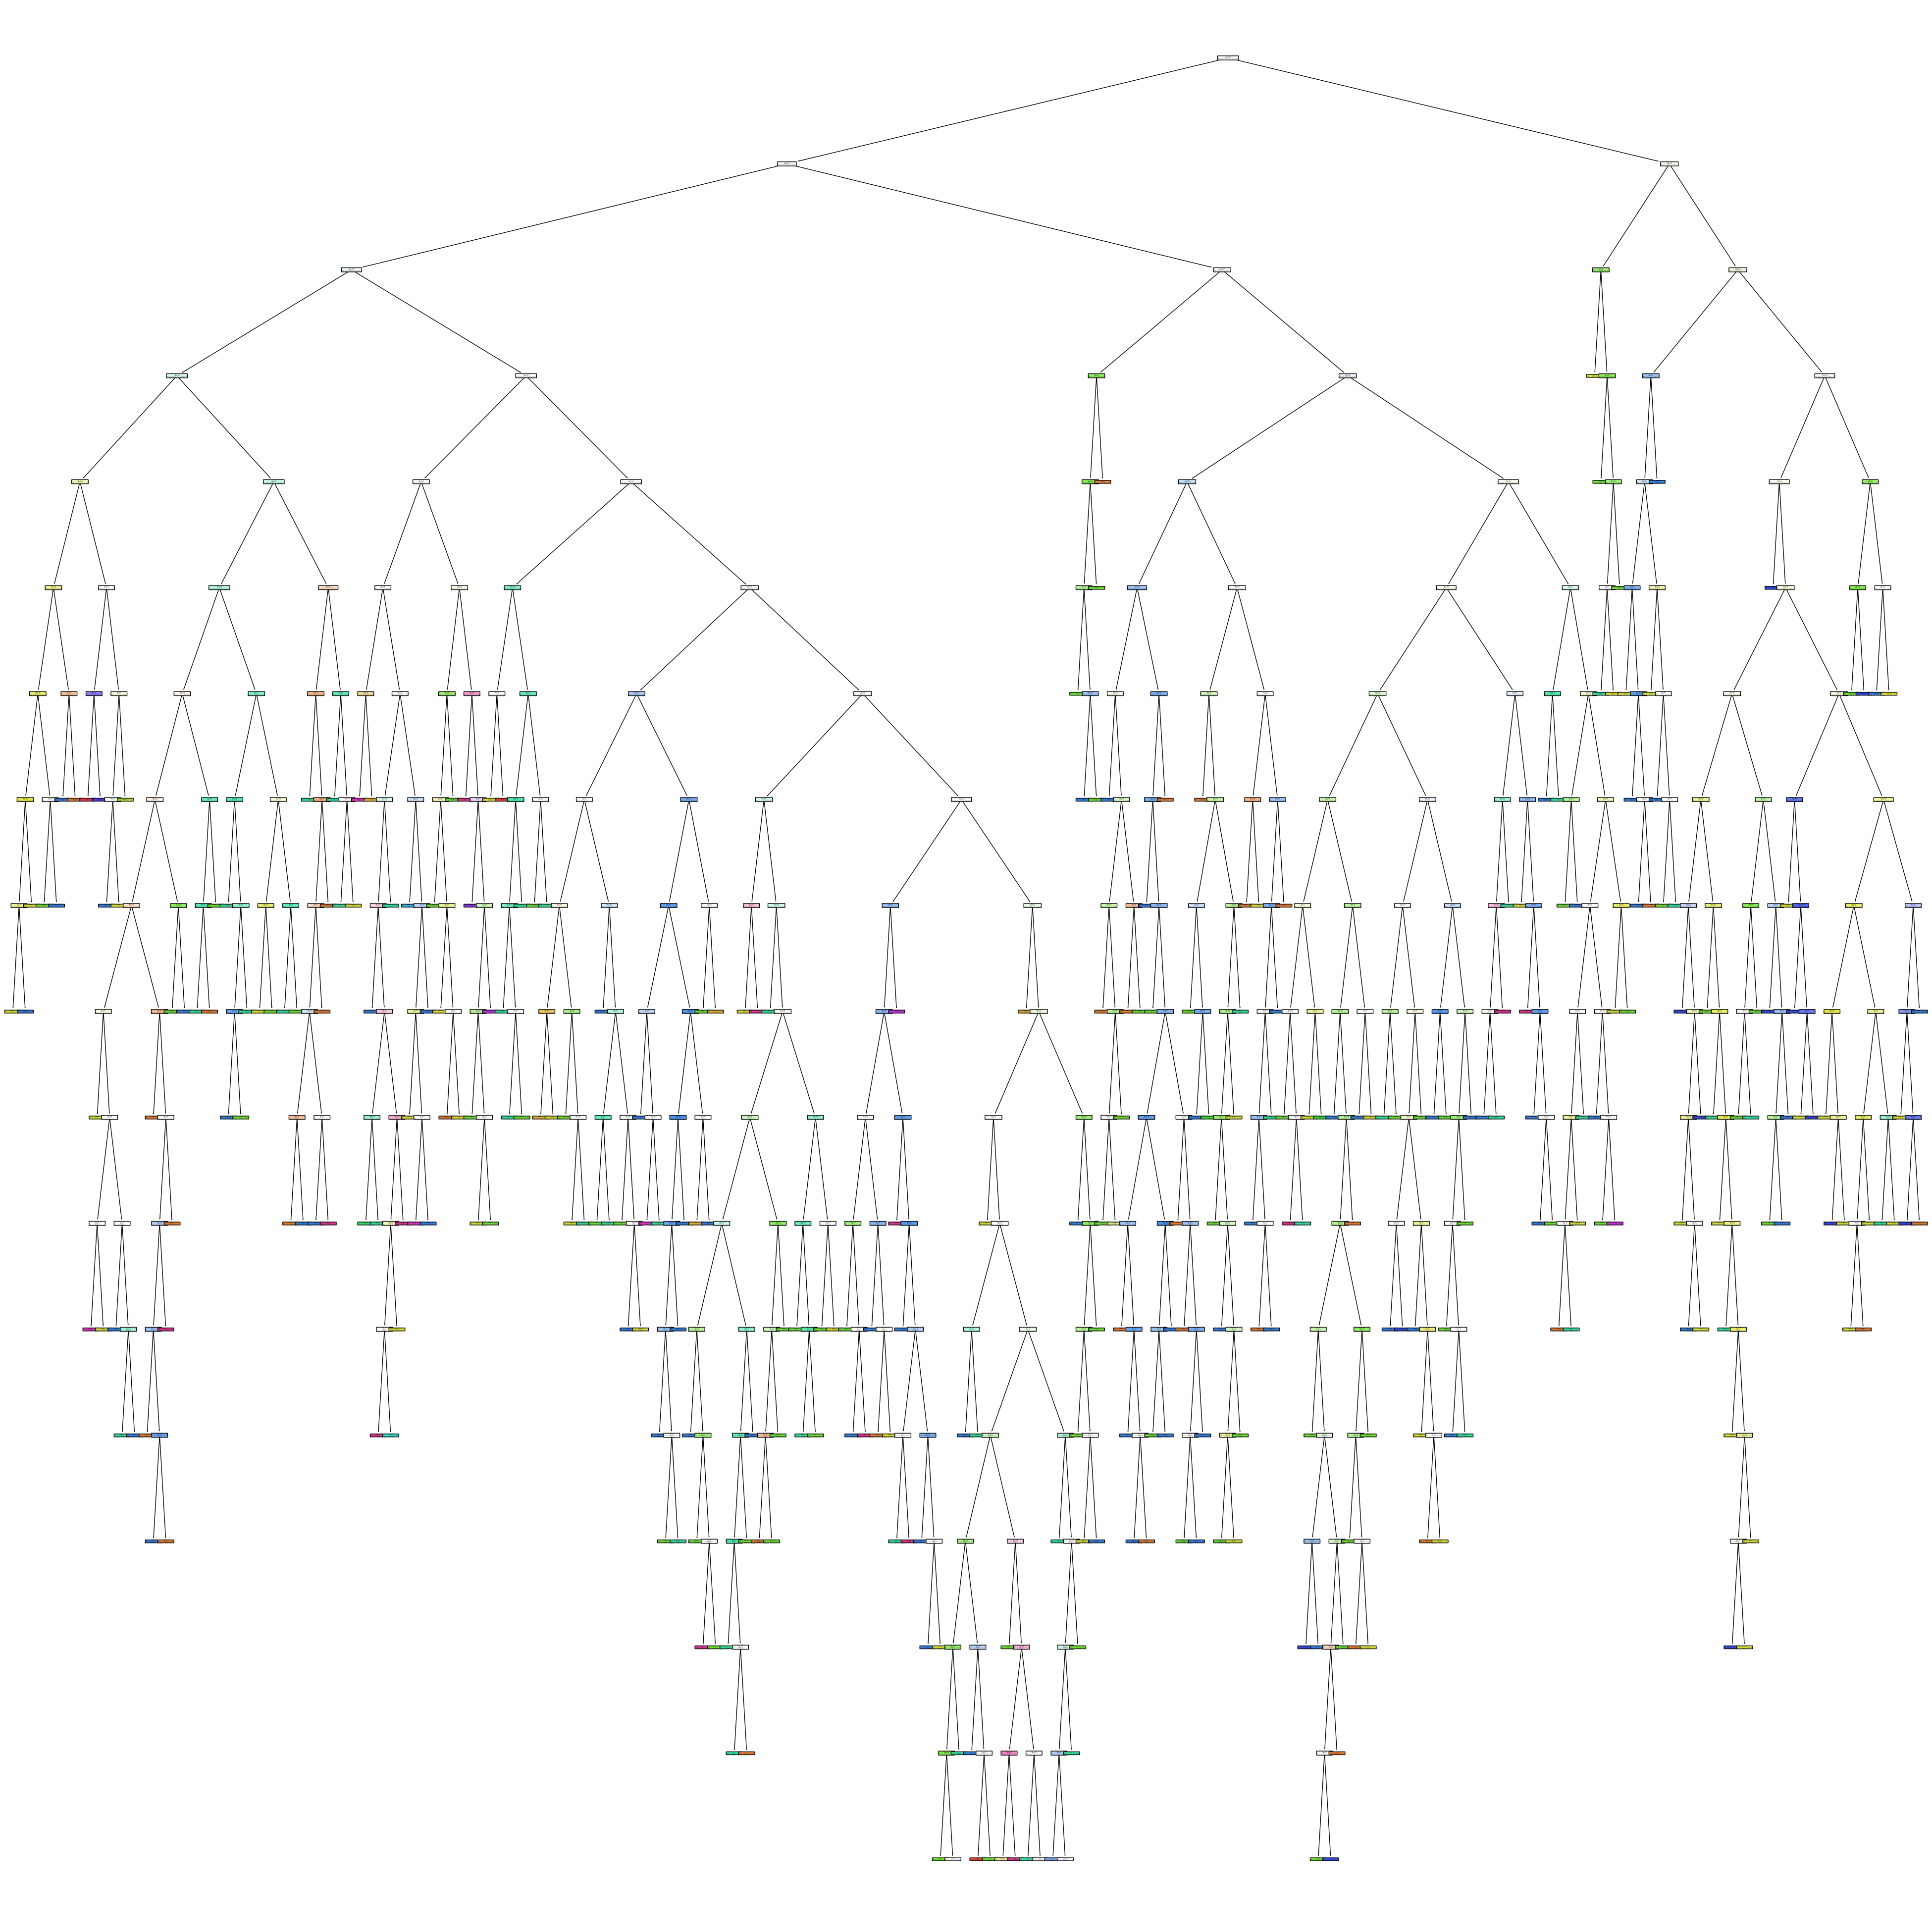

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=17, min_samples_leaf=1, min_samples_split=2)

clf.fit(X_train, y_train)

plt.figure(figsize=(50, 50))
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()

In [ ]:
print(clf.get_depth())

17


In [ ]:
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Acer       0.44      0.44      0.44        41
       Apple       0.62      0.83      0.71         6
        Asus       0.32      0.49      0.39        47
       Chuwi       0.00      0.00      0.00         0
        Dell       0.66      0.63      0.65       115
     Fujitsu       0.00      0.00      0.00         1
      Google       0.00      0.00      0.00         2
          HP       0.70      0.57      0.63       124
      Huawei       0.00      0.00      0.00         1
          LG       1.00      1.00      1.00         1
      Lenovo       0.54      0.52      0.53       114
         MSI       0.46      0.52      0.49        25
    Mediacom       0.50      0.75      0.60         4
   Microsoft       1.00      1.00      1.00         3
       Razer       1.00      0.67      0.80         3
     Samsung       0.00      0.00      0.00         4
     Toshiba       0.21      0.29      0.24        14
        Vero       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

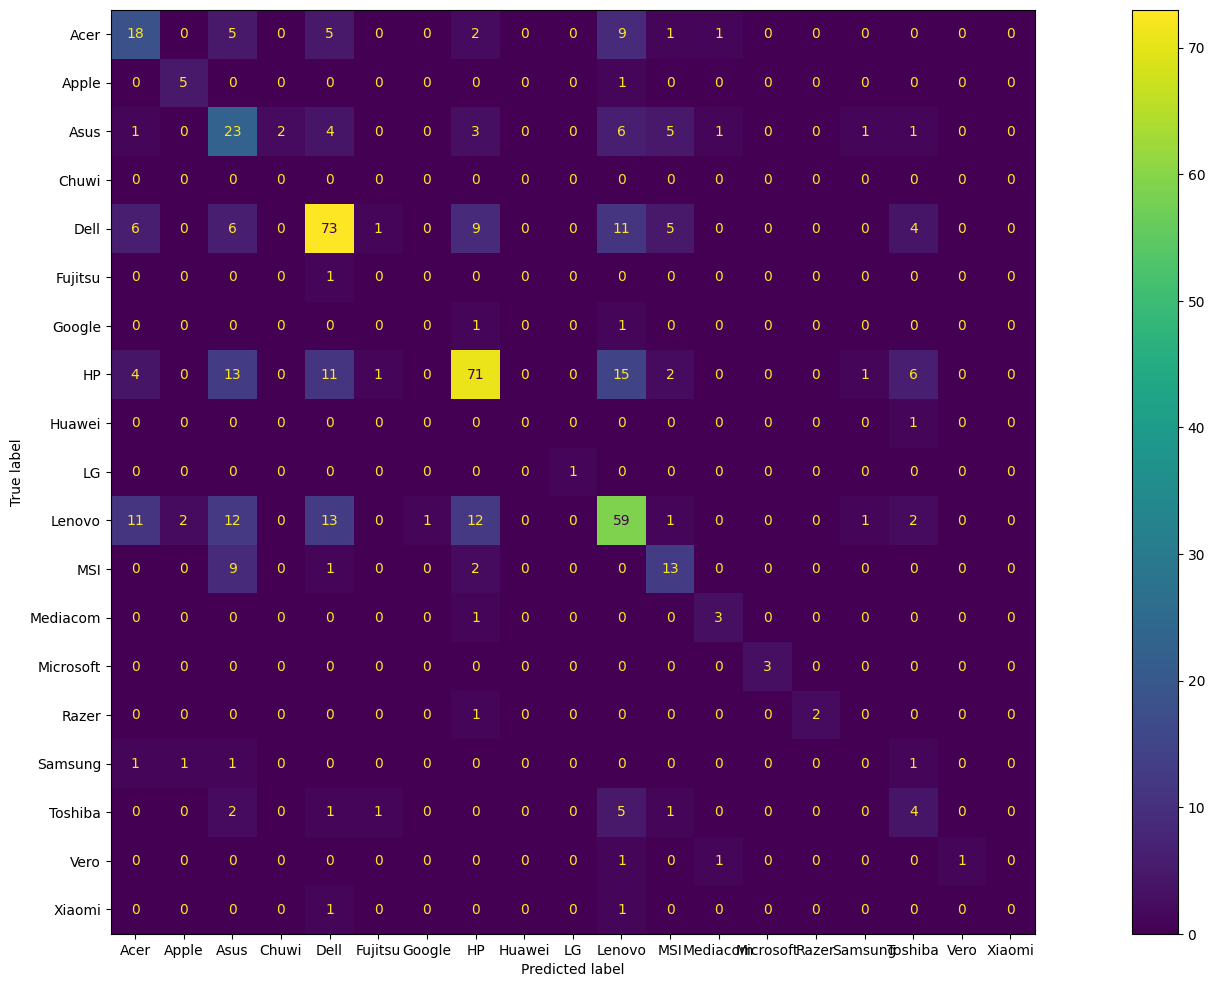

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(y_train))

fig, ax = plt.subplots(figsize=(25, 12))
cm_display.plot(ax=ax)
plt.show()

### Second Method

In [ ]:
accuracy = []

for depth in range(1, 20, 1):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=10)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

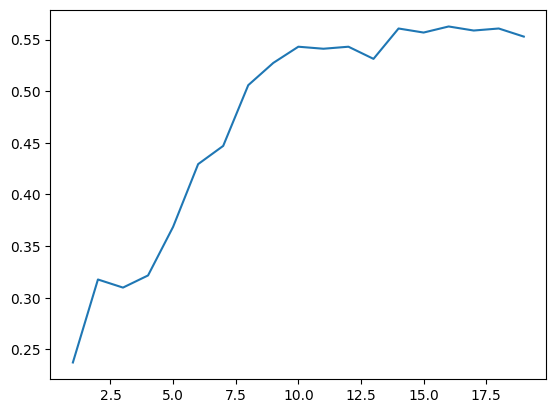

In [ ]:
plt.plot(range(1,20),accuracy)

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Acer       0.40      0.41      0.41        41
       Apple       0.56      0.83      0.67         6
        Asus       0.34      0.49      0.40        47
       Chuwi       0.00      0.00      0.00         0
        Dell       0.72      0.67      0.69       115
     Fujitsu       0.00      0.00      0.00         1
      Google       1.00      0.50      0.67         2
          HP       0.67      0.60      0.63       124
      Huawei       1.00      1.00      1.00         1
          LG       1.00      1.00      1.00         1
      Lenovo       0.51      0.48      0.50       114
         MSI       0.45      0.52      0.48        25
    Mediacom       0.50      0.75      0.60         4
   Microsoft       1.00      1.00      1.00         3
       Razer       1.00      0.67      0.80         3
     Samsung       0.00      0.00      0.00         4
     Toshiba       0.24      0.29      0.26        14
        Vero       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

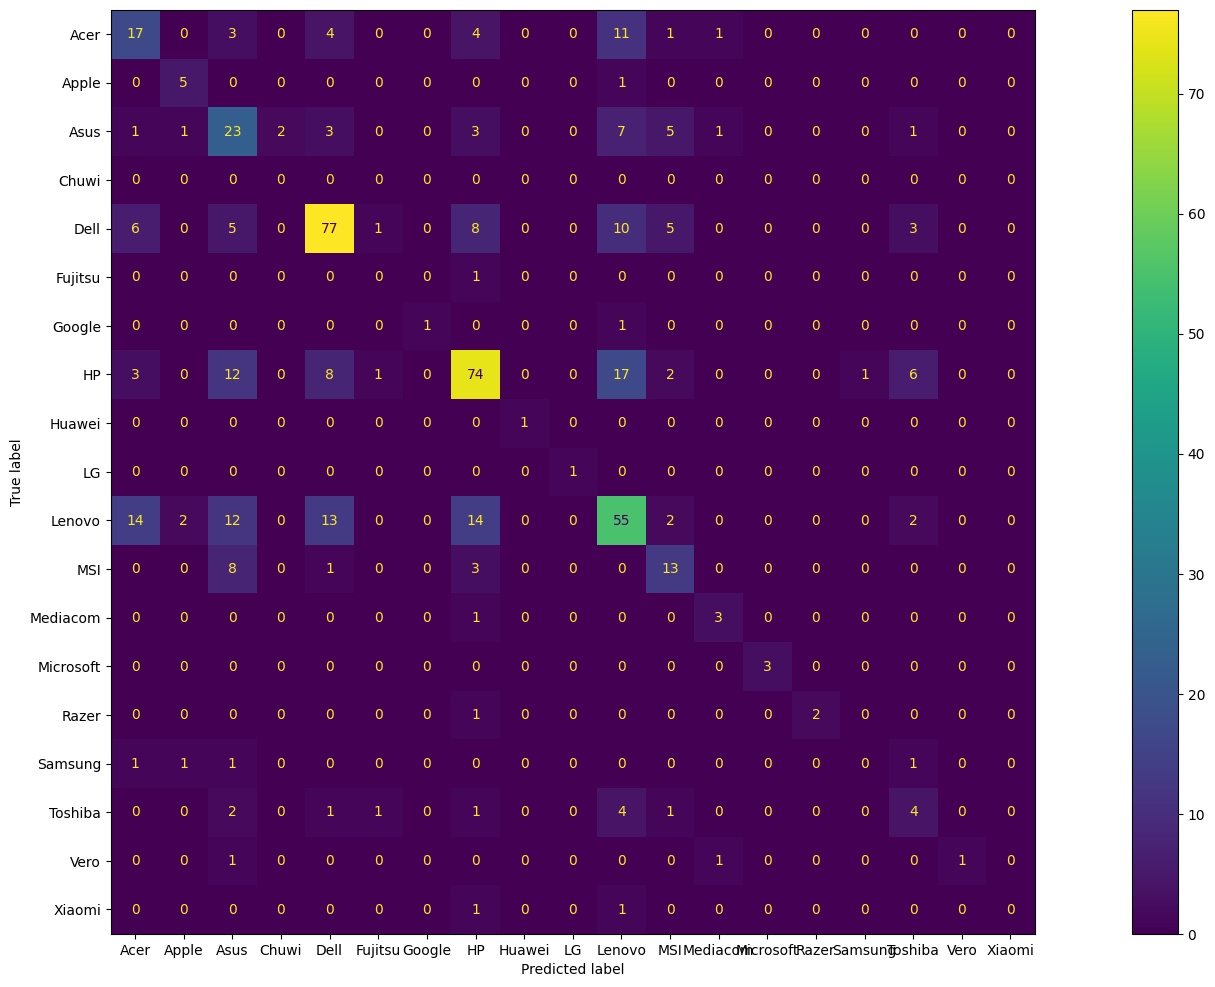

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(y_train))

fig, ax = plt.subplots(figsize=(25, 12))
cm_display.plot(ax=ax)
plt.show()

# Post-prunning

In [ ]:
clf = DecisionTreeClassifier()

path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("CCP alphas : ", ccp_alphas)
print("Impurities : ", impurities)

CCP alphas :  [0.         0.00069717 0.00079224 0.00087146 0.00087146 0.00087146
 0.00087146 0.00087146 0.00087146 0.00087146 0.00098039 0.00098039
 0.00098039 0.00098039 0.00098039 0.00104575 0.00104575 0.00108932
 0.00108932 0.00108932 0.00114379 0.00114379 0.00115196 0.00116195
 0.00117647 0.00117647 0.00119826 0.00119826 0.00124183 0.00130719
 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719
 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719
 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719
 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719 0.00130719
 0.00130719 0.00130719 0.00130719 0.00130719 0.00145243 0.0014718
 0.00149393 0.00152505 0.00152505 0.00152505 0.00152505 0.00152505
 0.00153787 0.00153958 0.00154062 0.00156863 0.00156863 0.00162037
 0.00166394 0.00169935 0.00169935 0.001735   0.00174292 0.00174292
 0.00174292 0.00174292 0.00174292 0.00174292 0.00174292 0.00174292
 0.00174292 0.00174292 0.0017513  0.00182214 0.00

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)

  clfs.append(clf)
print(clfs)

[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.0006971677559912851, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0007922360863537335, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0008714596949891066, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0008714596949891067, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0008714596949891067, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0008714596949891067, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0008714596949891067, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0008714596949891067, random_state=0), DecisionTreeClassifier(ccp_alpha=0.0008714596949891068, random_state=0), DecisionTreeClassifier(ccp_alpha=0.000980392156862745, random_state=0), DecisionTreeClassifier(ccp_alpha=0.000980392156862745, random_state=0), DecisionTreeClassifier(ccp_alpha=0.000980392156862745, random_state=0), DecisionTreeClassifier(ccp_alpha=0.000980392156862745, random_state=0), DecisionTreeCl

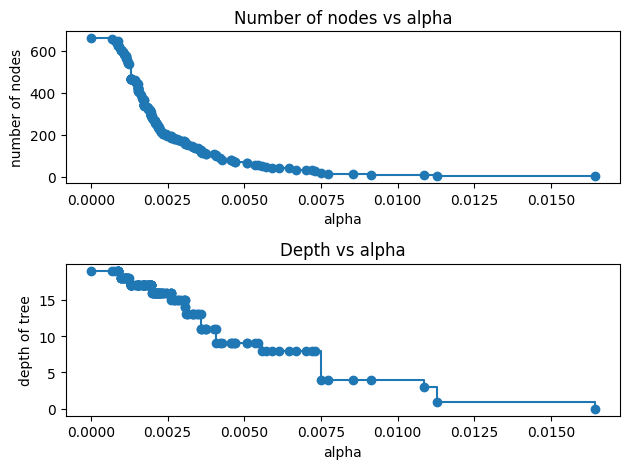

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

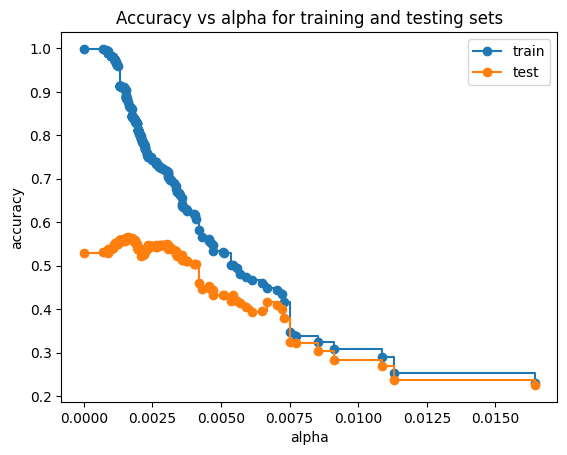

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.00079224)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Acer       0.39      0.44      0.41        41
       Apple       0.83      0.83      0.83         6
        Asus       0.35      0.51      0.41        47
       Chuwi       0.00      0.00      0.00         0
        Dell       0.72      0.68      0.70       115
     Fujitsu       0.00      0.00      0.00         1
      Google       1.00      0.50      0.67         2
          HP       0.69      0.60      0.64       124
      Huawei       0.00      0.00      0.00         1
          LG       1.00      1.00      1.00         1
      Lenovo       0.56      0.53      0.54       114
         MSI       0.48      0.52      0.50        25
    Mediacom       0.50      0.75      0.60         4
   Microsoft       1.00      1.00      1.00         3
       Razer       1.00      0.67      0.80         3
     Samsung       0.00      0.00      0.00         4
     Toshiba       0.25      0.29      0.27        14
        Vero       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
print(clf.get_depth())

19


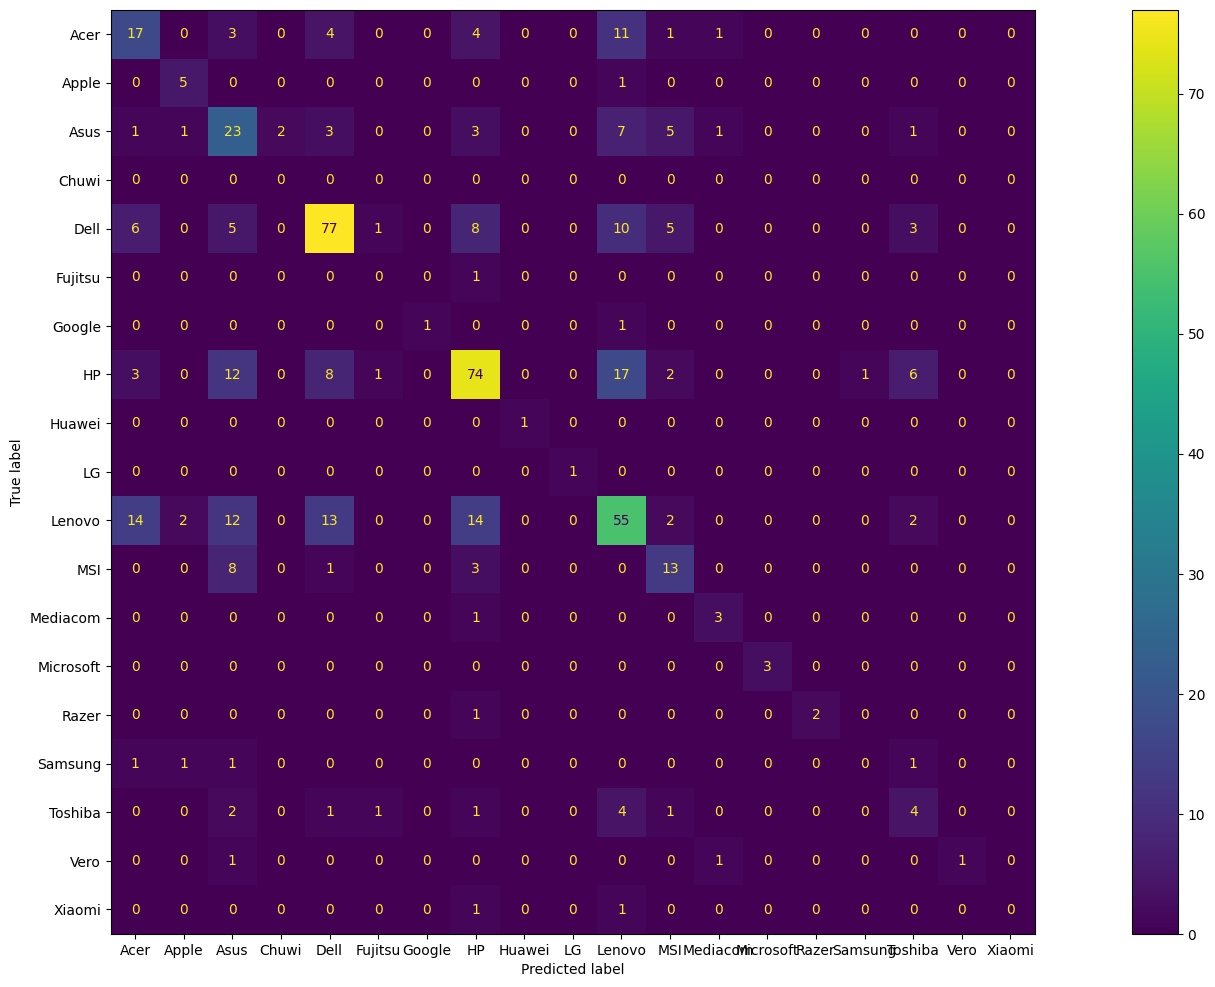

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_diplay = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(y_train))

fig, ax = plt.subplots(figsize=(25, 12))
cm_display.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the features and target variable
features = [
    ["red", "large"],
    ["green", "small"],
    ["red", "small"],
    ["yellow", "large"],
    ["green", "large"],
    ["orange", "large"],
]
target_variable = ["apple", "lime", "strawberry", "banana", "grape", "orange"]

# Flatten the features list for encoding
flattened_features = [item for sublist in features for item in sublist]

# Use a single LabelEncoder for all features and target variable
le = LabelEncoder()
le.fit(flattened_features + target_variable)

# Encode features and target variable
encoded_features = [le.transform(item) for item in features]
encoded_target = le.transform(target_variable)

# Create a CART classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(encoded_features, encoded_target)

# Predict the fruit type for a new instance
new_instance = ["red", "large"]
encoded_new_instance = le.transform(new_instance)
predicted_fruit_type = clf.predict([encoded_new_instance])
decoded_predicted_fruit_type = le.inverse_transform(predicted_fruit_type)
print("Predicted fruit type:", decoded_predicted_fruit_type[0])

Predicted fruit type: apple


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Charger les données
data = {
    'Name': ['Rob Walton', 'Sergey Brin', 'Steve Ballmer', 'Mukesh Ambani', 'Jim Walton', 'Sergey Brin',
             'Michael Bloomberg', 'Warren Buffett', 'Carlos Slim', 'Larry Page'],
    'Country': ['Mexico', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'France', 'USA', 'USA'],
    'Industry': ['Finance', 'Automotive', 'Manufacturing', 'Technology', 'Fashion', 'Technology',
                 'Cosmetics', 'Retail', 'Technology', 'Technology'],
    'Net Worth (in billions)': [8.5, 44.76, 13.43, 120.44, 122.39, 93.19, 117.96, 36.62, 97.35, 88.05],
    'Company': ['Walmart', 'Google', 'Koch Industries', 'Google', 'Walmart', 'Walmart',
                'Reliance Industries', 'Microsoft', 'Reliance Industries', 'Google']
}

wealth_people = pd.DataFrame(data)

# Encodage des variables cibles (Company)
le_company = LabelEncoder()
wealth_people['Company'] = le_company.fit_transform(wealth_people['Company'])

# Séparer les features (X) et la cible (y)
X = wealth_people[['Country', 'Industry', 'Net Worth (in billions)']]  # Utiliser des features catégorielles + Net Worth
y = wealth_people['Company']  # Prédire Company

# OneHotEncoding des colonnes catégorielles (Country et Industry)
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country', 'Industry'])], remainder='passthrough')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Appliquer l'encodage one-hot aux données d'entraînement et de test
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# Entraîner un classifieur d'arbre de décision
clf = DecisionTreeClassifier(random_state=101)
clf.fit(X_train_enc, y_train)

# Prédire les cibles sur l'ensemble de test
y_pred = clf.predict(X_test_enc)

# Évaluer les résultats
print("Company Classification Report")
print(classification_report(y_test, y_pred))


Company Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       2.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_